# Compare elements that are short and long

In review, it was suggested we analyze systemic differences between elements <100bp versus longer ones. We will do this by splitting our bam files into short and long and then calling active and silent regions for both. 

## Split all bam files into short and long. 

Based on bimodal peaks in insert size figure, split the humps using a threshold of 125bp. 

In [ ]:
# bash kernel
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'


cd $BAM_DIR

for i in RNA DNA
do
    for j in Rep1 Rep2 Rep3
    do
        #split
        samtools view -@ 12 -h GM12878inGM12878_${i}_${j}.filtered.pos-sorted.bam | \
            awk 'substr($0,1,1)=="@" || ($9<= 125) || ($9>=-125)' | \
            samtools view -@ 12 -b > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam
        samtools view -@ 12 -h GM12878inGM12878_${i}_${j}.filtered.pos-sorted.bam | \
            awk 'substr($0,1,1)=="@" || ($9> 125) || ($9<-125)' | \
            samtools view -@ 12 -b > GM12878inGM12878_${i}_${j}.greater-than-125bp.filtered.bam
        #name sort
        samtools sort -@ 12 -n GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.n-sorted.bam
        samtools sort -@ 12 -n GM12878inGM12878_${i}_${j}.greater-than-125bp.filtered.bam > GM12878inGM12878_${i}_${j}.greater-than-125bp.filtered.n-sorted.bam
    done
done

[bam_sort_core] merging from 36 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 48 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 36 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...


In [1]:
# didnt finish, re-run starting at DNA rep2
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'


cd $BAM_DIR

for i in DNA
do
    for j in Rep2 Rep3
    do
        #split
        samtools view -@ 12 -h GM12878inGM12878_${i}_${j}.filtered.pos-sorted.bam | \
            awk 'substr($0,1,1)=="@" || ($9<= 125) || ($9>=-125)' | \
            samtools view -@ 12 -b > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam
        samtools view -@ 12 -h GM12878inGM12878_${i}_${j}.filtered.pos-sorted.bam | \
            awk 'substr($0,1,1)=="@" || ($9> 125) || ($9<-125)' | \
            samtools view -@ 12 -b > GM12878inGM12878_${i}_${j}.greater-than-125bp.filtered.bam
        #name sort
        samtools sort -@ 12 -n GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.n-sorted.bam
        samtools sort -@ 12 -n GM12878inGM12878_${i}_${j}.greater-than-125bp.filtered.bam > GM12878inGM12878_${i}_${j}.greater-than-125bp.filtered.n-sorted.bam
    done
done

[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...


In [5]:
# the 125 and less needs to be ammended. Re run just that one. The fileters applied were wrong.

# bash kernel
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'


cd $BAM_DIR

for i in RNA DNA
do
    for j in Rep1 Rep2 Rep3
    do
        #split
        samtools view -@ 12 -h GM12878inGM12878_${i}_${j}.filtered.pos-sorted.bam | \
            awk 'substr($0,1,1)=="@" || ($9<= 125 && $9>=0) || ($9>= -125 && $9<=0)' | \
            samtools view -@ 12 -b > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam
        #name sort
        samtools sort -@ 12 -n GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.n-sorted.bam
    done
done

[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...



In [1]:
# didnt finish, re-run starting at DNA rep3

# bash kernel
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'


cd $BAM_DIR

for i in DNA
do
    for j in Rep3
    do
        #split
        samtools view -@ 12 -h GM12878inGM12878_${i}_${j}.filtered.pos-sorted.bam | \
            awk 'substr($0,1,1)=="@" || ($9<= 125 && $9>=0) || ($9>= -125 && $9<=0)' | \
            samtools view -@ 12 -b > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam
        #name sort
        samtools sort -@ 12 -n GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.bam > GM12878inGM12878_${i}_${j}.125bp-or-less.filtered.n-sorted.bam
    done
done

[bam_sort_core] merging from 12 files and 12 in-memory blocks...


## Plot number of reads in each set

In [4]:
# how many were split?
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'


cd $BAM_DIR

for i in RNA DNA
do
    for j in Rep1 Rep2 Rep3
    do
        for k in 125bp-or-less greater-than-125bp
        do
            echo ${i}_${j}_${k}
            samtools flagstat -@ 12 GM12878inGM12878_${i}_${j}.${k}.filtered.bam
        done
    done
done

RNA_Rep1_125bp-or-less
60047308 + 0 in total (QC-passed reads + QC-failed reads)
60047308 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
60047308 + 0 mapped (100.00% : N/A)
60047308 + 0 primary mapped (100.00% : N/A)
60047308 + 0 paired in sequencing
30023654 + 0 read1
30023654 + 0 read2
60047308 + 0 properly paired (100.00% : N/A)
60047308 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
RNA_Rep1_greater-than-125bp
52508227 + 0 in total (QC-passed reads + QC-failed reads)
52508227 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
52508227 + 0 mapped (100.00% : N/A)
52508227 + 0 primary mapped (100.00% : N/A)
52508227 + 0 paired in sequencing
26254124 + 0 read1
26254103 + 0 read2
52508227 + 0 properly paired (100.00% : N/A)
52508227 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 +

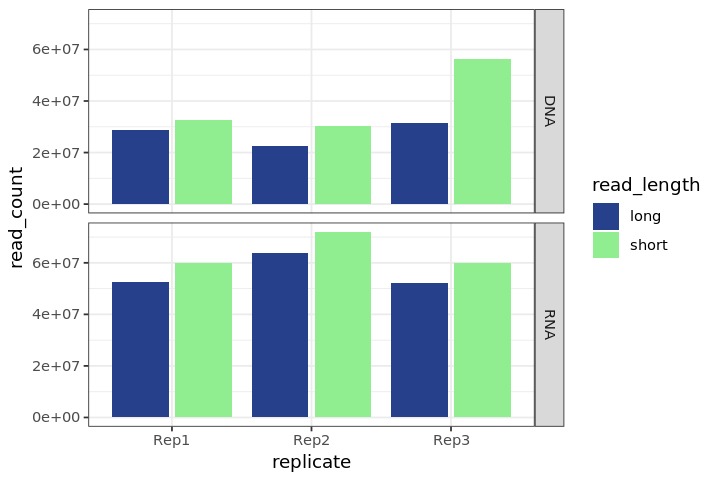

In [26]:
# r kernel
library(tidyverse)

data <- data.frame(read_length = c("short", "long","short", "long","short", "long", 
                                   "short", "long","short", "long","short", "long"), 
replicate = c("Rep1", "Rep1", "Rep2", "Rep2", "Rep3", "Rep3",
              "Rep1", "Rep1", "Rep2", "Rep2", "Rep3", "Rep3"),
type = c("RNA", "RNA", "RNA", "RNA", "RNA", "RNA",
         "DNA", "DNA", "DNA", "DNA", "DNA", "DNA"), 
read_count = c(60047308, 52508227, 72048484, 63794276, 60123722, 52015802,
               32708490, 28865973, 30366970, 22665432, 56400078, 31644860))

p <- ggplot(data, aes(x = replicate, y = read_count, fill = read_length)) +
        geom_col(position = "dodge2") +
        facet_grid(type~.) +
        scale_fill_manual(values = c("royalblue4", "lightgreen")) +
        theme_bw()

options(repr.plot.height = 4, repr.plot.width = 6)
p

In [27]:
ggsave(p, device = cairo_pdf, height = 4, width = 6, 
       filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/readcount_barchart.pdf")

## Call active and silent regions

In [1]:
%%bash
cd ../method_paper_GitHub/2_peak-and-region_calling

#view python script behavior:
python3 call_ATAC-STARR_regulatory-regions.py --help

usage: call_ATAC-STARR_regulatory-regions.py [-h] [-i CHRACC_PEAKS]
                                             [-d DNA_BAMS [DNA_BAMS ...]]
                                             [-r RNA_BAMS [RNA_BAMS ...]]
                                             [-o OUT_DIR] [-q FDR]
                                             [-n THREADS]

Call ATAC-STARR Regulatory Regions

required arguments:
  -i CHRACC_PEAKS, --ChrAcc_peaks CHRACC_PEAKS
                        accessibility peaks (narrow-peak format)
  -d DNA_BAMS [DNA_BAMS ...], --DNA_bams DNA_BAMS [DNA_BAMS ...]
                        reisolated plasmid DNA bam files
  -r RNA_BAMS [RNA_BAMS ...], --RNA_bams RNA_BAMS [RNA_BAMS ...]
                        reporter RNA bam files
  -o OUT_DIR, --out_dir OUT_DIR
                        output directory

optional arguments:
  -h, --help            show this help message and exit
  -q FDR, --fdr FDR     false discovery rate for differential analysis
                        (default: 0

In [1]:
%%bash
PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/short'

#SHORT

cd ../method_paper_GitHub/2_peak-and-region_calling

#Call active and silent regions with the python script. 
python3 call_ATAC-STARR_regulatory-regions.py -n 12 -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.125bp-or-less.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep2.125bp-or-less.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep3.125bp-or-less.filtered.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.125bp-or-less.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep2.125bp-or-less.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep3.125bp-or-less.filtered.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.125bp-or-less.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.125bp-or-less.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.125bp-or-less.filtered.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.125bp-or-less.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.125bp-or-less.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.125bp


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.125bp-or-less.fi ... ||
||                           o GM12878inGM12878_DNA_Rep2.125bp-or-less.fi ... ||
||                           o GM12878inGM12878_DNA_Rep3.125bp-or-less.fi ... ||
||                           o GM12878inGM12878_RNA_Rep1.125bp-or

In [3]:
%%bash
PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/long'

#LONG

cd ../method_paper_GitHub/2_peak-and-region_calling

#Call active and silent regions with the python script. 
python3 call_ATAC-STARR_regulatory-regions.py -n 12 -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.greater-than-125bp.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep2.greater-than-125bp.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep3.greater-than-125bp.filtered.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.greater-than-125bp.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep2.greater-than-125bp.filtered.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep3.greater-than-125bp.filtered.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.greater-than-125bp.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.greater-than-125bp.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.greater-than-125bp.filtered.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.greater-than-125bp.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.greater-than-125bp.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM1287


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.greater-than-125 ... ||
||                           o GM12878inGM12878_DNA_Rep2.greater-than-125 ... ||
||                           o GM12878inGM12878_DNA_Rep3.greater-than-125 ... ||
||                           o GM12878inGM12878_RNA_Rep1.greater-

## Compare short and long region counts and overlap

In [1]:
# bash kernel
cd /data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis

#how many?
wc -l short/*_regions.bed long/*_regions.bed

  10789 short/active_regions.bed
   6213 short/silent_regions.bed
  20833 long/active_regions.bed
  16872 long/silent_regions.bed
  54707 total


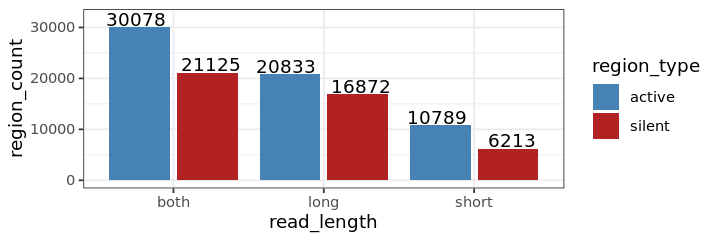

In [35]:
#plot counts as barchart
# r kernel
library(tidyverse)

df <- data.frame(read_length = c("short", "long", "both", "short", "long", "both"),
region_type = c("active", "active", "active", "silent", "silent", "silent"),
region_count = c(10789, 20833, 30078, 6213, 16872, 21125))


p <- ggplot(df, aes(x = read_length, y = region_count, fill = region_type)) +
        geom_bar(stat='identity', position = 'dodge2') +
        geom_text(vjust = -0.1, aes(label = region_count), position = position_dodge2(width = 1)) +
        scale_fill_manual(values = c("steelblue", "firebrick")) +
        theme_bw() +
        coord_cartesian(ylim = c(0, 32000))

options(repr.plot.height = 2, repr.plot.width = 6)
p

In [36]:
ggsave(p, device = cairo_pdf, height = 2, width = 6, 
       filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/region-count_barchart.pdf")

In [2]:
# bash kernel
cd /data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis

ALL_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/'

#active
bedtools jaccard -a long/active_regions.bed -b short/active_regions.bed
bedtools jaccard -a long/active_regions.bed -b ${ALL_DIR}/active_regions.bed
bedtools jaccard -a short/active_regions.bed -b ${ALL_DIR}/active_regions.bed
bedtools intersect -u -a short/active_regions.bed -b long/active_regions.bed | \
    bedtools jaccard -a - -b ${ALL_DIR}/active_regions.bed

intersection	union	jaccard	n_intersections
235700	3817820	0.0617368	2540
intersection	union	jaccard	n_intersections
2325580	4644530	0.500714	17183
intersection	union	jaccard	n_intersections
595910	4402820	0.135347	6304
intersection	union	jaccard	n_intersections
291560	3967950	0.0734788	2483


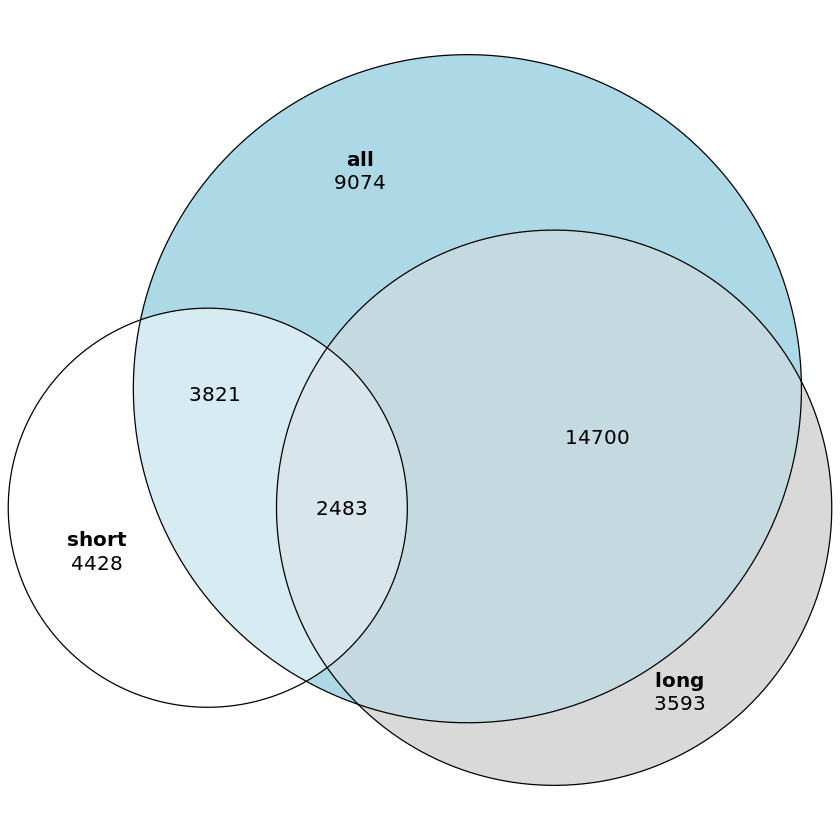

In [7]:
#plot active overlap

# r kernel
library(eulerr)

#Make a vector of the values above:
combo <- c(short = 10789-(2540-2483)-(6304-2483)-2483, long = 20833-(2540-2483)-(17183-2483)-2483, all = 30078-(6304-2483)-(17183-2483)-2483, 
           "short&long" = 2540-2483, "short&all" = 6304-2483, "long&all" = 17183-2483, "long&short&all" = 2483)
eul <- plot(euler(combo), quantities = TRUE) 
eul

In [10]:
ggplot2::ggsave(eul, device = cairo_pdf, height = 4, width = 4, 
       filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/active_euler.pdf")

In [3]:
ALL_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/'

#silent
bedtools jaccard -a long/silent_regions.bed -b short/silent_regions.bed
bedtools jaccard -a long/silent_regions.bed -b ${ALL_DIR}/silent_regions.bed
bedtools jaccard -a short/silent_regions.bed -b ${ALL_DIR}/silent_regions.bed
bedtools intersect -u -a short/silent_regions.bed -b long/silent_regions.bed | \
    bedtools jaccard -a - -b ${ALL_DIR}/silent_regions.bed

intersection	union	jaccard	n_intersections
487980	4205840	0.116024	4667
intersection	union	jaccard	n_intersections
3199360	5213850	0.613627	15848
intersection	union	jaccard	n_intersections
648780	4467610	0.145219	5531
intersection	union	jaccard	n_intersections
559050	4420880	0.126457	4480


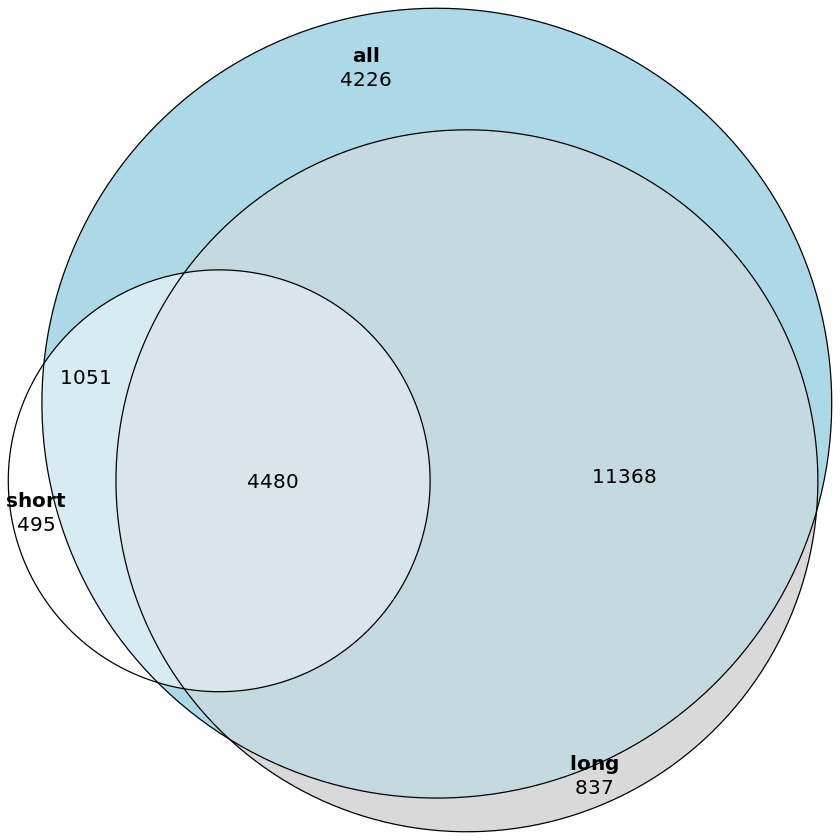

In [11]:
#plot silent overlap

# r kernel
library(eulerr)

#Make a vector of the values above:
combo <- c(short = 6213-(4667-4480)-(5531-4480)-4480, long = 16872-(15848-4480)-(4667-4480)-4480, all = 21125-(5531-4480)-(15848-4480)-4480, 
           "short&long" = 4667-4480, "short&all" = 5531-4480, "long&all" = 15848-4480, "long&short&all" = 4480)
eul <- plot(euler(combo), quantities = TRUE) 
eul

In [12]:
ggplot2::ggsave(eul, device = cairo_pdf, height = 4, width = 4, 
       filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/silent_euler.pdf")

## Compare region size distribution

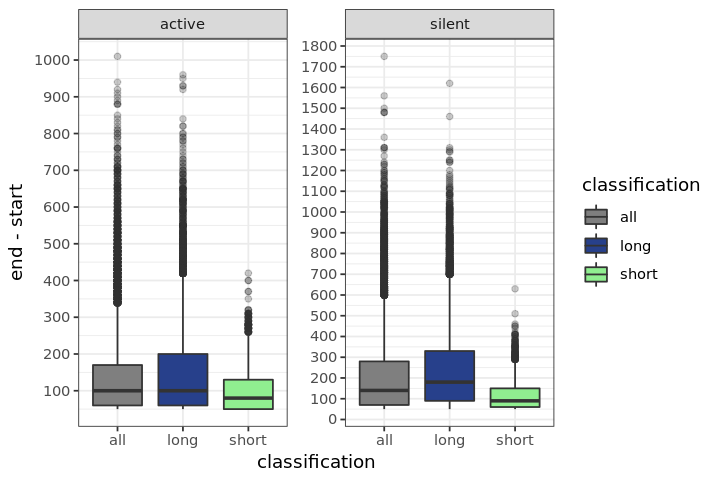

In [36]:
library(tidyverse)

col <- c("chr", "start", "end")

#read in files
active_all <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed", col_names = col, show_col_types = FALSE) %>%
    mutate(region_type = "active", classification = "all")
active_long <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/long/active_regions.bed", col_names = col, show_col_types = FALSE) %>%
    mutate(region_type = "active", classification = "long")
active_short <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/short/active_regions.bed", col_names = col, show_col_types = FALSE) %>%
    mutate(region_type = "active", classification = "short")

silent_all <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_regions.bed", col_names = col, show_col_types = FALSE) %>%
    mutate(region_type = "silent", classification = "all")
silent_long <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/long/silent_regions.bed", col_names = col, show_col_types = FALSE) %>%
    mutate(region_type = "silent", classification = "long")
silent_short <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/short/silent_regions.bed", col_names = col, show_col_types = FALSE) %>%
    mutate(region_type = "silent", classification = "short")

#combine
df <- bind_rows(active_all, active_long, active_short, silent_all, silent_long, silent_short)

#plot
p <- ggplot(df, aes(x = classification, y = end-start, fill = classification)) +
        geom_boxplot(outlier.alpha = 0.25) +
        facet_wrap(~region_type, scales = "free") +
        scale_y_continuous(breaks = seq(from = 0, to = 2000, by=100)) +
        scale_fill_manual(values = c("grey50", "royalblue4", "lightgreen")) +
        theme_bw()

options(repr.plot.height = 4, repr.plot.width = 6)
p

In [37]:
ggplot2::ggsave(p, device = cairo_pdf, height = 4, width = 6, 
       filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/region-size-dist.pdf")

## Compare TSS annotations

In [40]:
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

In [42]:
active_all <- annotatePeak("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed", 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

active_long <- annotatePeak("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/long/active_regions.bed", 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

active_short <- annotatePeak("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/short/active_regions.bed", 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

silent_all <- annotatePeak("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_regions.bed", 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

silent_long <- annotatePeak("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/long/silent_regions.bed", 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

silent_short <- annotatePeak("/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/short/silent_regions.bed", 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

>> loading peak file...				 2022-05-26 10:22:50 PM 
>> preparing features information...		 2022-05-26 10:22:51 PM 
>> identifying nearest features...		 2022-05-26 10:23:24 PM 
>> calculating distance from peak to TSS...	 2022-05-26 10:23:25 PM 
>> assigning genomic annotation...		 2022-05-26 10:23:25 PM 
>> adding gene annotation...			 2022-05-26 10:24:16 PM 


Loading required package: org.Hs.eg.db



'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-05-26 10:24:17 PM 
>> done...					 2022-05-26 10:24:17 PM 
>> loading peak file...				 2022-05-26 10:24:17 PM 
>> preparing features information...		 2022-05-26 10:24:18 PM 
>> identifying nearest features...		 2022-05-26 10:24:18 PM 
>> calculating distance from peak to TSS...	 2022-05-26 10:24:19 PM 
>> assigning genomic annotation...		 2022-05-26 10:24:19 PM 
>> adding gene annotation...			 2022-05-26 10:24:27 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-05-26 10:24:27 PM 
>> done...					 2022-05-26 10:24:27 PM 
>> loading peak file...				 2022-05-26 10:24:27 PM 
>> preparing features information...		 2022-05-26 10:24:28 PM 
>> identifying nearest features...		 2022-05-26 10:24:28 PM 
>> calculating distance from peak to TSS...	 2022-05-26 10:24:32 PM 
>> assigning genomic annotation...		 2022-05-26 10:24:32 PM 
>> adding gene annotation...			 2022-05-26 10:24:38 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-05-26 10:24:38 PM 
>> done...					 2022-05-26 10:24:38 PM 
>> loading peak file...				 2022-05-26 10:24:38 PM 
>> preparing features information...		 2022-05-26 10:24:38 PM 
>> identifying nearest features...		 2022-05-26 10:24:38 PM 
>> calculating distance from peak to TSS...	 2022-05-26 10:24:39 PM 
>> assigning genomic annotation...		 2022-05-26 10:24:39 PM 
>> adding gene annotation...			 2022-05-26 10:24:45 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-05-26 10:24:46 PM 
>> done...					 2022-05-26 10:24:46 PM 
>> loading peak file...				 2022-05-26 10:24:46 PM 
>> preparing features information...		 2022-05-26 10:24:46 PM 
>> identifying nearest features...		 2022-05-26 10:24:46 PM 
>> calculating distance from peak to TSS...	 2022-05-26 10:24:47 PM 
>> assigning genomic annotation...		 2022-05-26 10:24:47 PM 
>> adding gene annotation...			 2022-05-26 10:24:52 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-05-26 10:24:52 PM 
>> done...					 2022-05-26 10:24:52 PM 
>> loading peak file...				 2022-05-26 10:24:52 PM 
>> preparing features information...		 2022-05-26 10:24:53 PM 
>> identifying nearest features...		 2022-05-26 10:24:53 PM 
>> calculating distance from peak to TSS...	 2022-05-26 10:24:53 PM 
>> assigning genomic annotation...		 2022-05-26 10:24:53 PM 
>> adding gene annotation...			 2022-05-26 10:24:59 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-05-26 10:24:59 PM 
>> done...					 2022-05-26 10:24:59 PM 


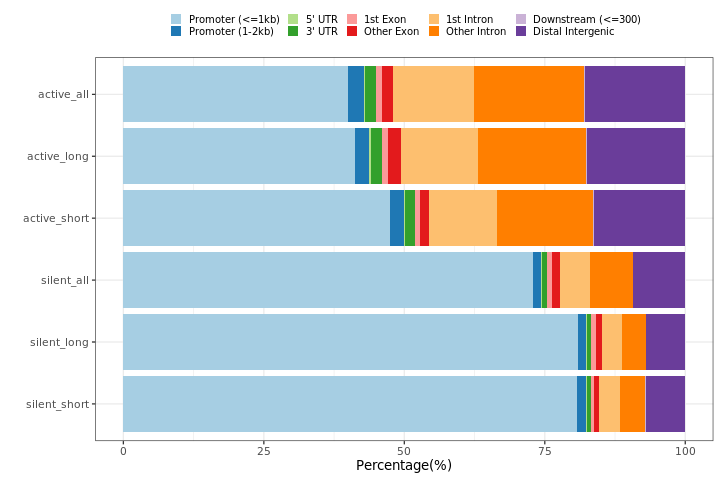

In [43]:
bar <- plotAnnoBar(list(active_all = active_all, active_long = active_long, active_short = active_short, 
                        silent_all = silent_all, silent_long = silent_long, silent_short = silent_short)) + 
    theme_bw(base_size = 8, base_family = "Arial") + 
    theme(legend.key.size = unit(0.1, "in"), legend.title = element_blank(), 
          plot.title = element_blank(), legend.position = "top", legend.text = element_text(size = 6)) 

bar

In [44]:
ggplot2::ggsave(bar, device = cairo_pdf, height = 4, width = 6, 
       filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/GR_revisions/short+long_analysis/annotation.pdf")